# Homework 2 Question 3

# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import utils
from keras.datasets import cifar10
from keras.layers.convolutional import Conv2D

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Prepare the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

## Underfit model

### Build the model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(.9))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 159us/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3227 - val_acc: 0.9000
Epoch 2/20
50000/50000 [==============================] - 7s 147us/step - loss: 0.3222 - acc: 0.8996 - val_loss: 0.3186 - val_acc: 0.8997
Epoch 3/20
50000/50000 [==============================] - 7s 144us/step - loss: 0.3198 - acc: 0.8996 - val_loss: 0.3161 - val_acc: 0.8997
Epoch 4/20
50000/50000 [==============================] - 7s 147us/step - loss: 0.3178 - acc: 0.8996 - val_loss: 0.3141 - val_acc: 0.8998
Epoch 5/20
50000/50000 [==============================] - 7s 149us/step - loss: 0.3155 - acc: 0.8997 - val_loss: 0.3116 - val_acc: 0.8998
Epoch 6/20
50000/50000 [==============================] - 7s 147us/step - loss: 0.3133 - acc: 0.8997 - val_loss: 0.3095 - val_acc: 0.8998
Epoch 7/20
50000/50000 [==============================] - 7s 145us/step - loss: 0.3114 - acc: 0.8998 - val_loss: 0.3074 - 

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/step
Test accuracy: 0.9017799785614014


### Training/test loss/accuracy during training 

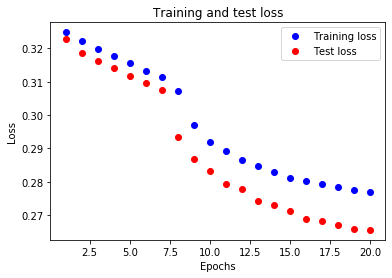

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

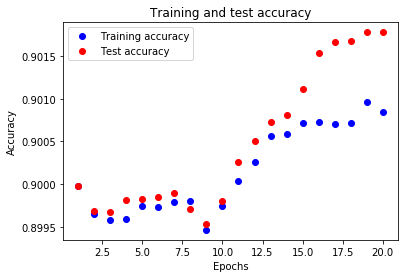

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The high accuracy of each epoch for the training and testing data is misleading since the neural network has a fairly inconsistent trend for the data. This is a result of undefiting the data and allowing too many positives to conslusively label the data.

## Overfit model

### Build the model

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [0]:
# Compile and train
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 262us/step - loss: 0.2383 - acc: 0.9103 - val_loss: 0.2075 - val_acc: 0.9198
Epoch 2/20
50000/50000 [==============================] - 11s 219us/step - loss: 0.1937 - acc: 0.9247 - val_loss: 0.1821 - val_acc: 0.9287
Epoch 3/20
50000/50000 [==============================] - 11s 219us/step - loss: 0.1720 - acc: 0.9327 - val_loss: 0.1680 - val_acc: 0.9344
Epoch 4/20
50000/50000 [==============================] - 11s 220us/step - loss: 0.1568 - acc: 0.9391 - val_loss: 0.1623 - val_acc: 0.9367
Epoch 5/20
50000/50000 [==============================] - 11s 218us/step - loss: 0.1454 - acc: 0.9440 - val_loss: 0.1550 - val_acc: 0.9396
Epoch 6/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.1358 - acc: 0.9476 - val_loss: 0.1599 - val_acc: 0.9374
Epoch 7/20
50000/50000 [==============================] - 11s 218us/step - loss: 0.1279 - acc: 0.9512 - val_loss: 0.

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 87us/step
Test accuracy: 0.9443499927520752


### Training/test loss/accuracy during training

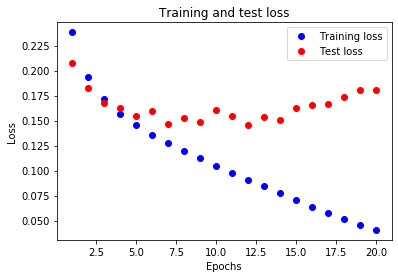

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

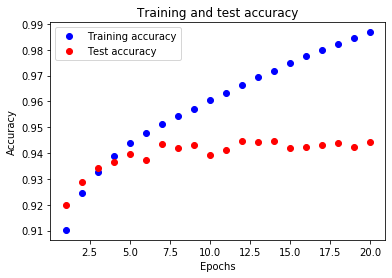

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The large gap between training and testing is a clear indication of an overfit model. The high traning accuracy resulting from a reduced amount of layers with sizes smaller than images sizes assist in creating this overfit gap.

## Pretty good model

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.15))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.25))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.25))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# Compile and train
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 462us/step - loss: 0.2866 - acc: 0.8990 - val_loss: 0.2427 - val_acc: 0.9068
Epoch 2/20
50000/50000 [==============================] - 20s 390us/step - loss: 0.2385 - acc: 0.9096 - val_loss: 0.2084 - val_acc: 0.9184
Epoch 3/20
50000/50000 [==============================] - 19s 375us/step - loss: 0.2125 - acc: 0.9183 - val_loss: 0.1952 - val_acc: 0.9246
Epoch 4/20
50000/50000 [==============================] - 19s 381us/step - loss: 0.1948 - acc: 0.9250 - val_loss: 0.1798 - val_acc: 0.9299
Epoch 5/20
50000/50000 [==============================] - 19s 378us/step - loss: 0.1815 - acc: 0.9300 - val_loss: 0.1677 - val_acc: 0.9352
Epoch 6/20
50000/50000 [==============================] - 19s 371us/step - loss: 0.1706 - acc: 0.9339 - val_loss: 0.1579 - val_acc: 0.9387
Epoch 7/20
50000/50000 [==============================] - 19s 382us/step - loss: 0.1623 - acc: 0.9371 - val_loss: 0.

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 115us/step
Test accuracy: 0.9576599964141845


### Training/test loss/accuracy during training

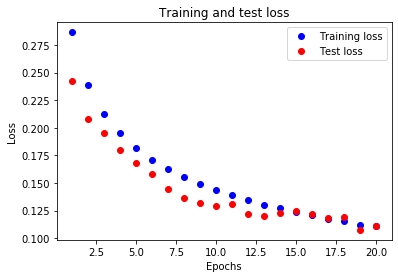

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

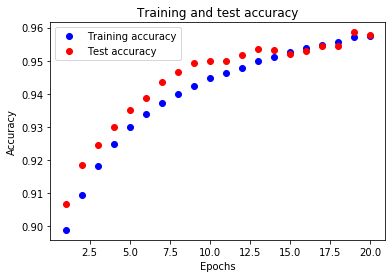

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This pretty good model utilizes max pooling and dropouts to modify the training epochs to align more with the testing's data. This model does not have an excessive gap between the training and testing accuracy which does not produce an overfit model. 